In [ ]:
#Importing all necessary modules and packages
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')

**PFIZER US EQUITY <*PFE*>** 

In [ ]:
#Read data from csv file and display first few rows
PFE_df = pd.read_csv('PFE.csv') 
PFE_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2/15/18,33.5289,33.8702,33.2540,33.3583,33.8512,21431059
1,2/16/18,33.8986,34.7518,33.8228,33.8512,34.3726,26242465
2,2/19/18,33.8986,34.7518,33.8228,33.8512,34.3726,26242465
3,2/20/18,34.1451,34.5932,34.0124,34.3726,34.1356,25808704
4,2/21/18,34.0977,34.6854,33.8702,34.1356,33.8986,24546750


In [ ]:
#Since our time-frame of analysis is large, we can relax on number of decimal places to consider
PFE_df = PFE_df.round(2)
PFE_df.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2/15/18,33.53,33.87,33.25,33.36,33.85,21431059
1,2/16/18,33.90,34.75,33.82,33.85,34.37,26242465


In [ ]:
#Determining the shape of the dataset 
PFE_df.shape

(522, 7)

In [ ]:
#Check if the dataset has any null values 
PFE_df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
#Drop the null entries from the dataset
PFE_df.dropna(inplace = True, axis = 0)

In [ ]:
#Check the data type of each column
PFE_df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [ ]:
#As we can see, the ‘Date’ column is not in appropriate format; coverting it to proper format using inbuilt features of Pandas 
PFE_df['Date'] = pd.to_datetime(PFE_df['Date'])
PFE_df.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-15,33.53,33.87,33.25,33.36,33.85,21431059
1,2018-02-16,33.90,34.75,33.82,33.85,34.37,26242465


In [ ]:
#Calculating total time duration for which we’re carrying out this analysis
PFE_df["Date"].max() - PFE_df["Date"].min()

Timedelta('729 days 00:00:00')

In [ ]:
#Now, we use the describe() function of Pandas to get high-level overview of how the HDFC stock performed in about last couple of month
PFE_df.iloc[-90:].describe().astype(int)

,Open,High,Low,Close,Adj Close,Volume
count,90,90,90,90,90,90
mean,36,36,36,36,36,20117466
std,1,1,1,1,1,8971355
min,34,34,34,34,34,4921941
25%,35,35,35,35,35,14572181
50%,36,36,36,36,36,18998478
75%,37,37,36,36,37,23202470
max,38,38,38,38,38,66605677


In [ ]:
#Setting the ‘Date’ column as the index of the dataframe as it makes plotting easy.
PFE_df.index = PFE_df["Date"]

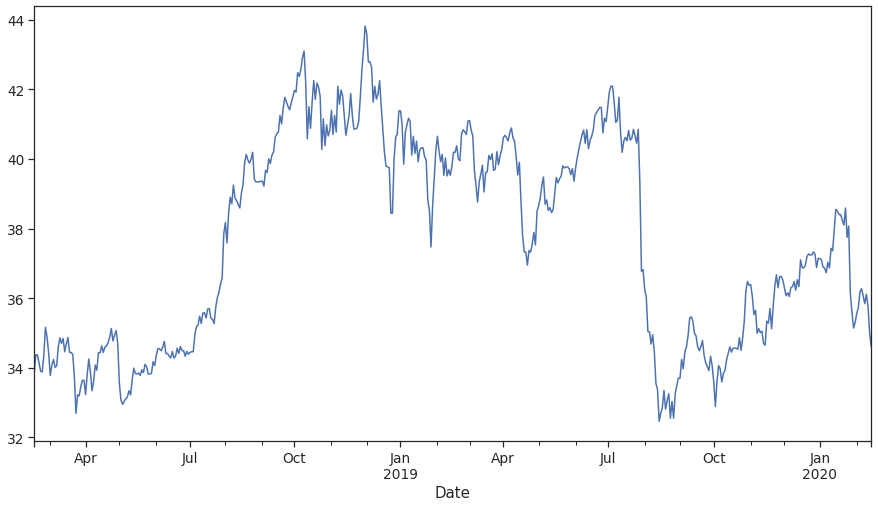

In [ ]:
#Plot the closing price (adjusted) of the stock over the period of 2 years to get a general idea of how the stock performed in the given period.
PFE_df["Adj Close"].plot(figsize = (15,8))
plt.show()

In [ ]:
#Introduce a new column ‘Day_Perc_Change’ denoting the daily returns in the price of the stock. 
PFE_df['Day_Perc_Change'] = PFE_df['Adj Close'].pct_change()*100
PFE_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Day_Perc_Change
Date,,,,,,,,
2018-02-15,2018-02-15,33.53,33.87,33.25,33.36,33.85,21431059,NaN
2018-02-16,2018-02-16,33.90,34.75,33.82,33.85,34.37,26242465,1.536189
2018-02-19,2018-02-19,33.90,34.75,33.82,33.85,34.37,26242465,0.000000
2018-02-20,2018-02-20,34.15,34.59,34.01,34.37,34.14,25808704,-0.669188
2018-02-21,2018-02-21,34.10,34.69,33.87,34.14,33.90,24546750,-0.702988


In [ ]:
#Dropping the NaN fields
PFE_df.dropna(axis = 0, inplace = True)

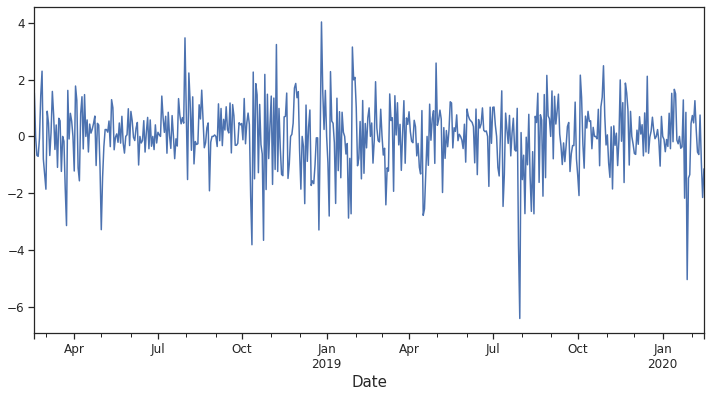

In [ ]:
#Representing daily returns in form of a plot
PFE_df["Day_Perc_Change"].plot(figsize = (12, 6), fontsize = 12)

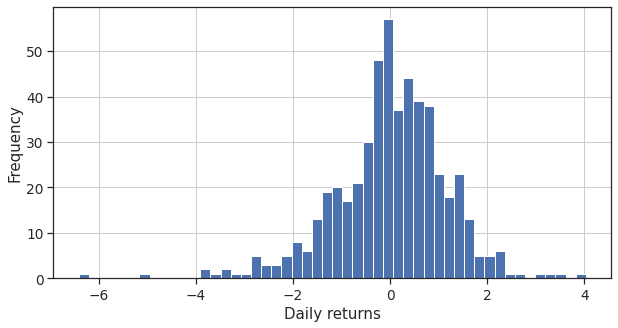

count    521.000000
mean       0.011128
std        1.169528
min       -6.413846
25%       -0.551204
50%        0.050839
75%        0.714498
max        4.032258
Name: Day_Perc_Change, dtype: float64

In [ ]:
#Plotting daily returns distribution histogram
PFE_df["Day_Perc_Change"].hist(bins = 50, figsize = (10,5)) 
plt.xlabel("Daily returns")
plt.ylabel("Frequency")
plt.show()
#satistics
PFE_df.Day_Perc_Change.describe()

In [ ]:
#We add a new column ‘Trend’ whose values are based on the day-to-day percentage change we calculated above.
def trend(x):
  if x > -0.5 and x <= 0.5:
    return "Slight or No change"
  elif x > 0.5 and x <= 1:
    return "Slight Positive"
  elif x > -1 and x <= -0.5:
    return "Slight Negative"
  elif x > 1 and x <= 3:
    return "Positive"
  elif x > -3 and x <= -1:
    return "Negative"
  elif x > 3 and x <= 7:
    return "Among top gainers"
  elif x > -7 and x <= -3:
    return "Among top losers"
  elif x > 7:
    return "Bull run"
  elif x <= -7:
    return "Bear drop"
PFE_df["Trend"]= np.zeros(PFE_df["Day_Perc_Change"].count())
PFE_df["Trend"]= PFE_df["Day_Perc_Change"].apply(lambda x:trend(x))
PFE_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Day_Perc_Change,Trend
Date,,,,,,,,,
2018-02-16,2018-02-16,33.90,34.75,33.82,33.85,34.37,26242465,1.536189,Positive
2018-02-19,2018-02-19,33.90,34.75,33.82,33.85,34.37,26242465,0.000000,Slight or No change
2018-02-20,2018-02-20,34.15,34.59,34.01,34.37,34.14,25808704,-0.669188,Slight Negative
2018-02-21,2018-02-21,34.10,34.69,33.87,34.14,33.90,24546750,-0.702988,Slight Negative
2018-02-22,2018-02-22,34.00,34.27,33.76,33.90,33.88,22754704,-0.058997,Slight or No change


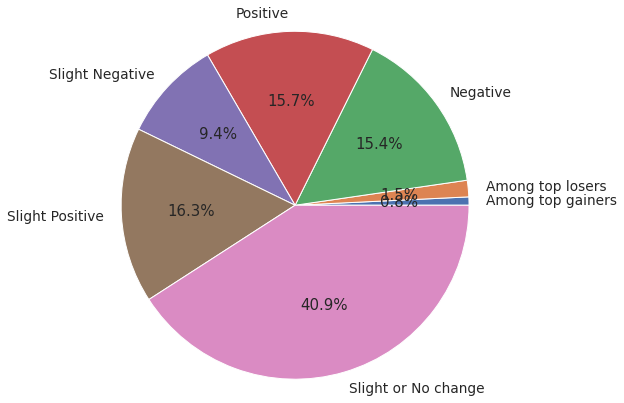

In [ ]:
#Visualizing Trend Frequency with Pie-Chart
PFE_pie_data = PFE_df.groupby('Trend')
pie_label = sorted([i for i in PFE_df.loc[:, 'Trend'].unique()])
plt.pie(PFE_pie_data['Trend'].count(), labels = pie_label, 
        autopct = '%1.1f%%', radius = 2)

plt.show()

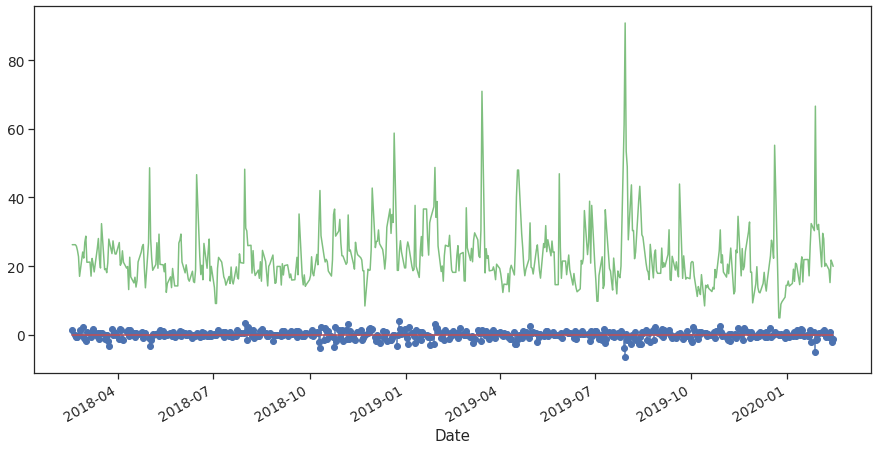

In [ ]:
#Plotting daily returns against the volume of the stocks
plt.stem(PFE_df["Date"], PFE_df["Day_Perc_Change"])
(PFE_df["Volume"]/1000000).plot(figsize = (15, 7.5), 
                                 color = "green", 
                                 alpha = 0.5)

**APPLE US EQUITY <*AAPL*>** 

In [ ]:
#Read data from csv file and display first few rows
AAPL_df = pd.read_csv("AAPL.csv") 
AAPL_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2/15/18,42.448,43.273,42.250,41.843,43.248,204588684
1,2/16/18,43.090,43.705,42.943,43.248,43.108,160704364
2,2/19/18,43.090,43.705,42.943,43.248,43.108,160704364
3,2/20/18,43.013,43.565,42.855,43.108,42.963,135722160
4,2/21/18,43.208,43.530,42.753,42.963,42.768,149886492


In [ ]:
#Since our time-frame of analysis is large, we can relax on number of decimal places to consider
AAPL_df = AAPL_df.round(2)
AAPL_df.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2/15/18,42.45,43.27,42.25,41.84,43.25,204588684
1,2/16/18,43.09,43.70,42.94,43.25,43.11,160704364


In [ ]:
#Determine the shape of the dataset
AAPL_df.shape

(522, 7)

In [ ]:
#Checking if the dataset has any null values
AAPL_df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
#Drop the null entries from the dataset
AAPL_df.dropna(inplace = True, axis = 0)

In [ ]:
#Check the data type of each column
AAPL_df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [ ]:
#As we can see, the ‘Date’ column is not in appropriate format; coverting it to proper format using inbuilt features of Pandas
AAPL_df['Date'] = pd.to_datetime(AAPL_df['Date'])
AAPL_df.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-15,42.45,43.27,42.25,41.84,43.25,204588684
1,2018-02-16,43.09,43.70,42.94,43.25,43.11,160704364


In [ ]:
#Calculating total time duration for which we’re carrying out this analysis
AAPL_df['Date'].max() - AAPL_df['Date'].min()

Timedelta('729 days 00:00:00')

In [ ]:
#Now, we use the describe() function of Pandas to get high-level overview of how the HDFC stock performed in about last couple of month
AAPL_df.iloc[-90:].describe().astype(int)

,Open,High,Low,Close,Adj Close,Volume
count,90,90,90,90,90,90
mean,70,70,69,70,70,110784402
std,7,7,6,7,7,36709636
min,58,58,58,58,58,46617452
25%,65,65,65,65,65,87909161
50%,68,69,68,68,69,104905750
75%,77,78,77,77,77,131455483
max,81,81,80,81,81,276130972


In [ ]:
#Set the ‘Date’ column as the index of the dataframe as it makes plotting easy
AAPL_df.index = AAPL_df['Date']

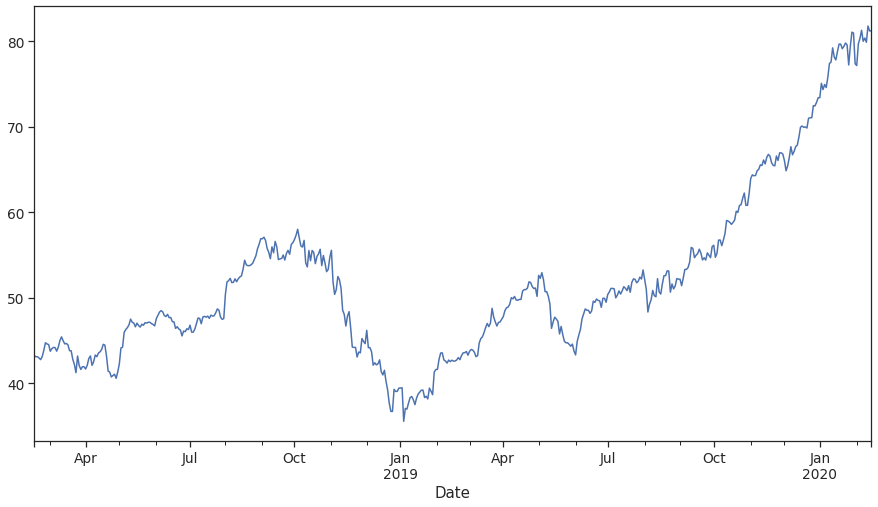

In [ ]:
#Plot the closing price (adjusted) of the stock over the period of 2 years to get a general idea of how the stock performed in the given period
AAPL_df['Adj Close'].plot(figsize = (15,8))
plt.show()

In [ ]:
#We introduce a new column ‘Day_Perc_Change’ denoting the daily returns in the price of the stock
AAPL_df['Day_Perc_Change'] = AAPL_df['Adj Close'].pct_change()*100
AAPL_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Day_Perc_Change
Date,,,,,,,,
2018-02-15,2018-02-15,42.45,43.27,42.25,41.84,43.25,204588684,NaN
2018-02-16,2018-02-16,43.09,43.70,42.94,43.25,43.11,160704364,-0.323699
2018-02-19,2018-02-19,43.09,43.70,42.94,43.25,43.11,160704364,0.000000
2018-02-20,2018-02-20,43.01,43.56,42.86,43.11,42.96,135722160,-0.347947
2018-02-21,2018-02-21,43.21,43.53,42.75,42.96,42.77,149886492,-0.442272


In [ ]:
#Dropping the NaN fields
AAPL_df.dropna(axis = 0, inplace = True)

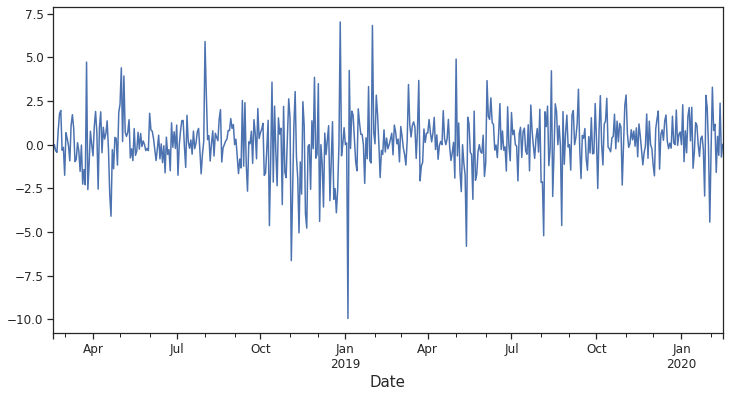

In [ ]:
#Representing daily returns in form of a plot
AAPL_df['Day_Perc_Change'].plot(figsize = (12, 6), fontsize = 12)

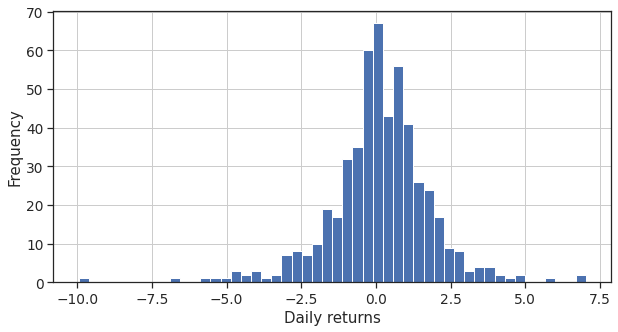

count    521.000000
mean       0.135440
std        1.692454
min       -9.954407
25%       -0.616497
50%        0.085788
75%        1.005840
max        7.028058
Name: Day_Perc_Change, dtype: float64

In [ ]:
#Plotting daily returns distribution histogram
AAPL_df['Day_Perc_Change'].hist(bins = 50, figsize = (10,5)) 
plt.xlabel('Daily returns')
plt.ylabel('Frequency')
plt.show()
#satistics
AAPL_df.Day_Perc_Change.describe()

In [ ]:
#We add a new column ‘Trend’ whose values are based on the day-to-day percentage change we calculated above
def trend(x):
  if x > -0.5 and x <= 0.5:
    return "Slight or No change"
  elif x > 0.5 and x <= 1:
    return "Slight Positive"
  elif x > -1 and x <= -0.5:
    return "Slight Negative"
  elif x > 1 and x <= 3:
    return "Positive"
  elif x > -3 and x <= -1:
    return "Negative"
  elif x > 3 and x <= 7:
    return "Among top gainers"
  elif x > -7 and x <= -3:
    return "Among top losers"
  elif x > 7:
    return "Bull run"
  elif x <= -7:
    return "Bear drop"
AAPL_df["Trend"]= np.zeros(AAPL_df["Day_Perc_Change"].count())
AAPL_df["Trend"]= AAPL_df["Day_Perc_Change"].apply(lambda x:trend(x))
AAPL_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Day_Perc_Change,Trend
Date,,,,,,,,,
2018-02-16,2018-02-16,43.09,43.70,42.94,43.25,43.11,160704364,-0.323699,Slight or No change
2018-02-19,2018-02-19,43.09,43.70,42.94,43.25,43.11,160704364,0.000000,Slight or No change
2018-02-20,2018-02-20,43.01,43.56,42.86,43.11,42.96,135722160,-0.347947,Slight or No change
2018-02-21,2018-02-21,43.21,43.53,42.75,42.96,42.77,149886492,-0.442272,Slight or No change
2018-02-22,2018-02-22,42.95,43.49,42.93,42.77,43.12,123967760,0.818331,Slight Positive


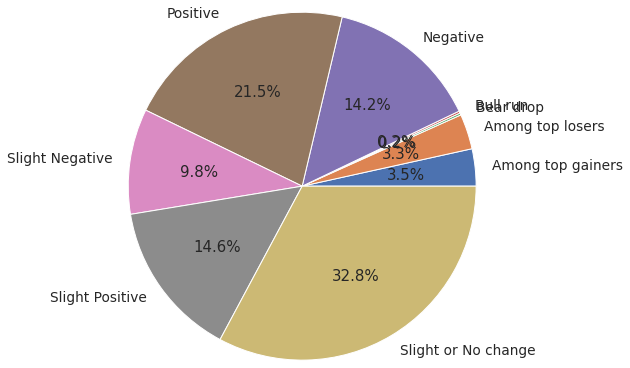

In [ ]:
#Visualizing Trend Frequency with Pie-Chart
AAPL_pie_data = AAPL_df.groupby('Trend')
pie_label = sorted([i for i in AAPL_df.loc[:, 'Trend'].unique()])
plt.pie(AAPL_pie_data['Trend'].count(), labels = pie_label, 
        autopct = '%1.1f%%', radius = 2)

plt.show()

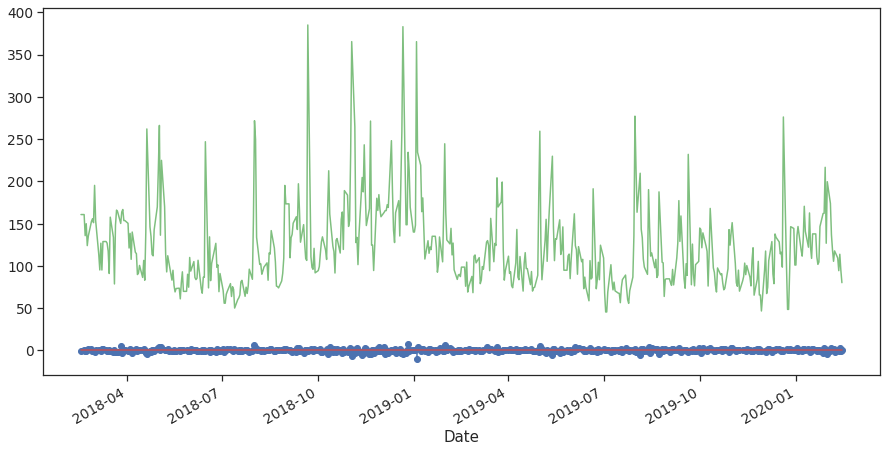

In [ ]:
#Plotting daily returns against the volume of the stocks
plt.stem(AAPL_df["Date"], AAPL_df["Day_Perc_Change"])
(AAPL_df["Volume"]/1000000).plot(figsize = (15, 7.5), 
                                 color = "green", 
                                 alpha = 0.5)

**COCA COLA US EQUITY <*KO*>** 

In [ ]:
#Read data from csv file and display first few rows
KO_df = pd.read_csv('KO.csv') 
KO_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2/15/18,44.25,44.8300,44.12,44.10,44.78,13467318
1,2/16/18,45.57,45.6401,44.72,44.78,44.98,17202302
2,2/19/18,45.57,45.6401,44.72,44.78,44.98,17202302
3,2/20/18,44.75,44.8300,43.94,44.98,43.99,14137347
4,2/21/18,44.11,44.2600,43.33,43.99,43.34,12792902


In [ ]:
#Since our time-frame of analysis is large, we can relax on number of decimal places to consider
KO_df = KO_df.round(2)
KO_df.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2/15/18,44.25,44.83,44.12,44.10,44.78,13467318
1,2/16/18,45.57,45.64,44.72,44.78,44.98,17202302


In [ ]:
#Determining the shape of the dataset 
KO_df.shape

(522, 7)

In [ ]:
#We check if the dataset has any null values
KO_df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
#Drop the null entries from the dataset
KO_df.dropna(inplace = True, axis = 0)

In [ ]:
#Checking the data type of each column
KO_df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [ ]:
#As we can see, the ‘Date’ column is not in appropriate format; coverting it to proper format using inbuilt features of Pandas
KO_df['Date'] = pd.to_datetime(KO_df['Date'])
KO_df.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-15,44.25,44.83,44.12,44.10,44.78,13467318
1,2018-02-16,45.57,45.64,44.72,44.78,44.98,17202302


In [ ]:
#Calculating total time duration for which we’re carrying out this analysis
KO_df['Date'].max() - KO_df['Date'].min()

Timedelta('729 days 00:00:00')

In [ ]:
#We use the describe() function of Pandas to get high-level overview of how the HDFC stock performed in about last couple of months
KO_df.iloc[-90:].describe().astype(int)

,Open,High,Low,Close,Adj Close,Volume
count,90,90,90,90,90,90
mean,55,55,54,54,55,11468819
std,2,2,2,2,2,3610757
min,51,51,51,51,51,3359259
25%,53,53,53,53,53,8869340
50%,54,54,54,54,54,11084295
75%,56,56,55,56,56,13743783
max,59,60,59,59,59,23833294


In [ ]:
#Setting the ‘Date’ column as the index of the dataframe as it makes plotting easy
KO_df.index = KO_df['Date']

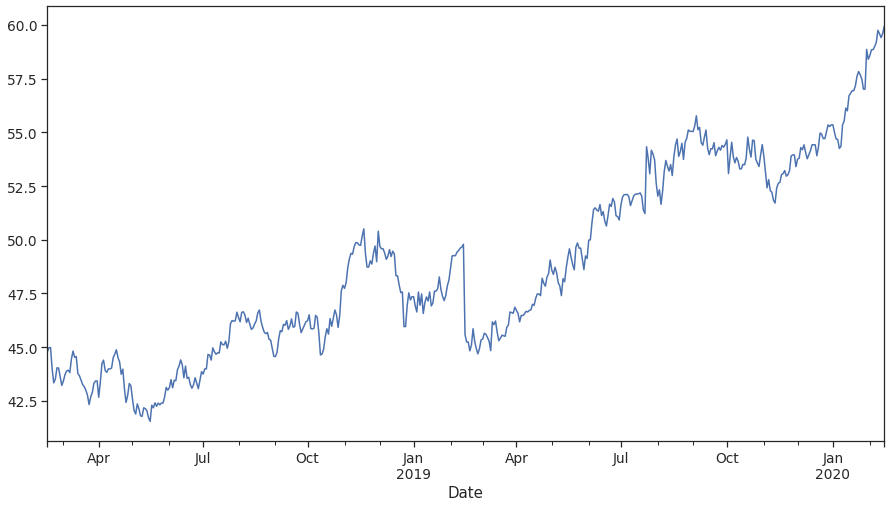

In [ ]:
#Plot the closing price (adjusted) of the stock over the period of 2 years to get a general idea of how the stock performed in the given period
KO_df['Adj Close'].plot(figsize = (15,8))
plt.show()

In [ ]:
#We introduce a new column ‘Day_Perc_Change’ denoting the daily returns in the price of the stock
KO_df['Day_Perc_Change'] = KO_df['Adj Close'].pct_change()*100
KO_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Day_Perc_Change
Date,,,,,,,,
2018-02-15,2018-02-15,44.25,44.83,44.12,44.10,44.78,13467318,NaN
2018-02-16,2018-02-16,45.57,45.64,44.72,44.78,44.98,17202302,0.446628
2018-02-19,2018-02-19,45.57,45.64,44.72,44.78,44.98,17202302,0.000000
2018-02-20,2018-02-20,44.75,44.83,43.94,44.98,43.99,14137347,-2.200978
2018-02-21,2018-02-21,44.11,44.26,43.33,43.99,43.34,12792902,-1.477609


In [ ]:
#Dropping the NaN fields
KO_df.dropna(axis = 0, inplace = True)

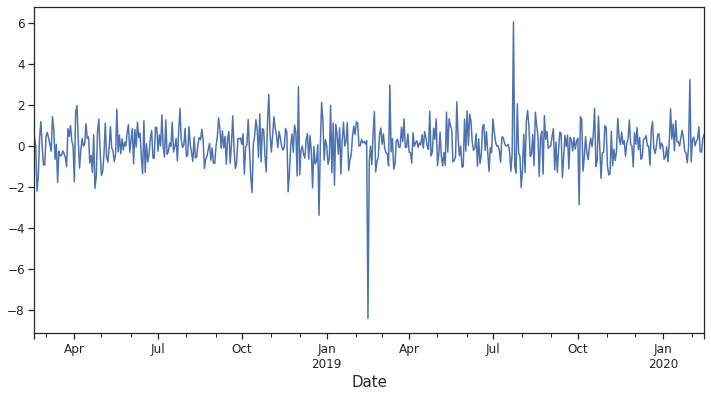

In [ ]:
#Representing daily returns in form of a plot
KO_df['Day_Perc_Change'].plot(figsize = (12, 6), fontsize = 12)

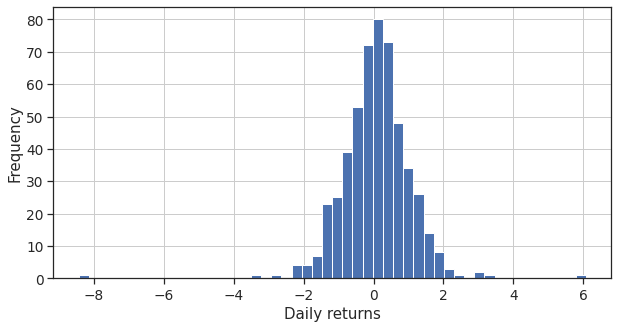

count    521.000000
mean       0.060821
std        0.978797
min       -8.435429
25%       -0.470790
50%        0.019183
75%        0.576590
max        6.071847
Name: Day_Perc_Change, dtype: float64

In [ ]:
#Plotting daily returns distribution histogram
KO_df['Day_Perc_Change'].hist(bins = 50, figsize = (10,5)) 
plt.xlabel('Daily returns')
plt.ylabel('Frequency')
plt.show()
#satistics
KO_df.Day_Perc_Change.describe()

In [ ]:
#We add a new column ‘Trend’ whose values are based on the day-to-day percentage change we calculated above
def trend(x):
  if x > -0.5 and x <= 0.5:
    return "Slight or No change"
  elif x > 0.5 and x <= 1:
    return "Slight Positive"
  elif x > -1 and x <= -0.5:
    return "Slight Negative"
  elif x > 1 and x <= 3:
    return "Positive"
  elif x > -3 and x <= -1:
    return "Negative"
  elif x > 3 and x <= 7:
    return "Among top gainers"
  elif x > -7 and x <= -3:
    return "Among top losers"
  elif x > 7:
    return "Bull run"
  elif x <= -7:
    return "Bear drop"
KO_df["Trend"]= np.zeros(KO_df["Day_Perc_Change"].count())
KO_df["Trend"]= KO_df["Day_Perc_Change"].apply(lambda x:trend(x))
KO_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Day_Perc_Change,Trend
Date,,,,,,,,,
2018-02-16,2018-02-16,45.57,45.64,44.72,44.78,44.98,17202302,0.446628,Slight or No change
2018-02-19,2018-02-19,45.57,45.64,44.72,44.78,44.98,17202302,0.000000,Slight or No change
2018-02-20,2018-02-20,44.75,44.83,43.94,44.98,43.99,14137347,-2.200978,Negative
2018-02-21,2018-02-21,44.11,44.26,43.33,43.99,43.34,12792902,-1.477609,Negative
2018-02-22,2018-02-22,43.43,43.82,43.22,43.34,43.52,12377840,0.415321,Slight or No change


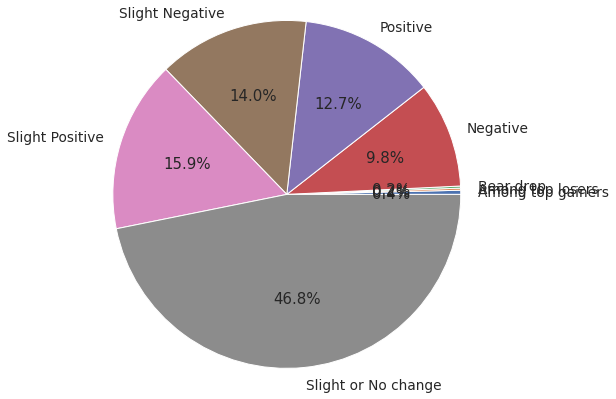

In [ ]:
#Visualizing Trend Frequency with Pie-Chart
KO_pie_data = KO_df.groupby('Trend')
pie_label = sorted([i for i in KO_df.loc[:, 'Trend'].unique()])
plt.pie(KO_pie_data['Trend'].count(), labels = pie_label, 
        autopct = '%1.1f%%', radius = 2)

plt.show()

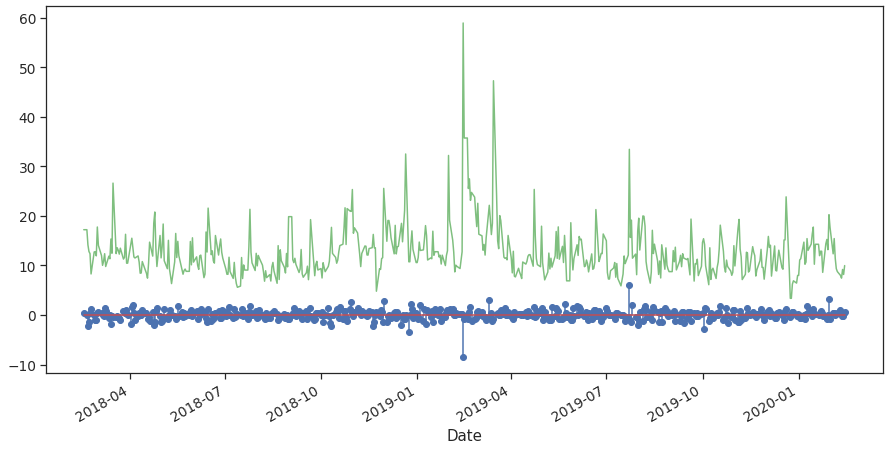

In [ ]:
#Plotting daily returns against the volume of the stocks
plt.stem(KO_df['Date'], KO_df['Day_Perc_Change'])
(KO_df['Volume']/1000000).plot(figsize = (15, 7.5), 
                                 color = 'green', 
                                 alpha = 0.5)

In [ ]:
#import package
import pandas_datareader.data as web
#set start and end dates 
start = datetime.datetime(2018, 2, 15)
end = datetime.datetime(2020, 2, 14) 
#extract the closing price data
combined_df = web.DataReader(["PFE", "AAPL", "KO", "^GSPC"],
"yahoo", start = start, end = end)["Adj Close"]

In [ ]:
#drop null values
combined_df.dropna(inplace = True, axis = 0)
#display first few rows
combined_df.head()

Symbols,PFE,AAPL,KO,^GSPC
Date,,,,
2018-02-15,29.959284,41.654278,40.230606,2731.199951
2018-02-16,30.420712,41.519432,40.410286,2732.219971
2018-02-20,30.210976,41.379780,39.520863,2716.260010
2018-02-21,30.001234,41.191971,38.936890,2701.330078
2018-02-22,29.984455,41.536293,39.098614,2703.959961


**CORRELATION AND VOLATILITY ANALYSIS OF PFE, AAPL AND KO equities against S&P 500 INDEX** 

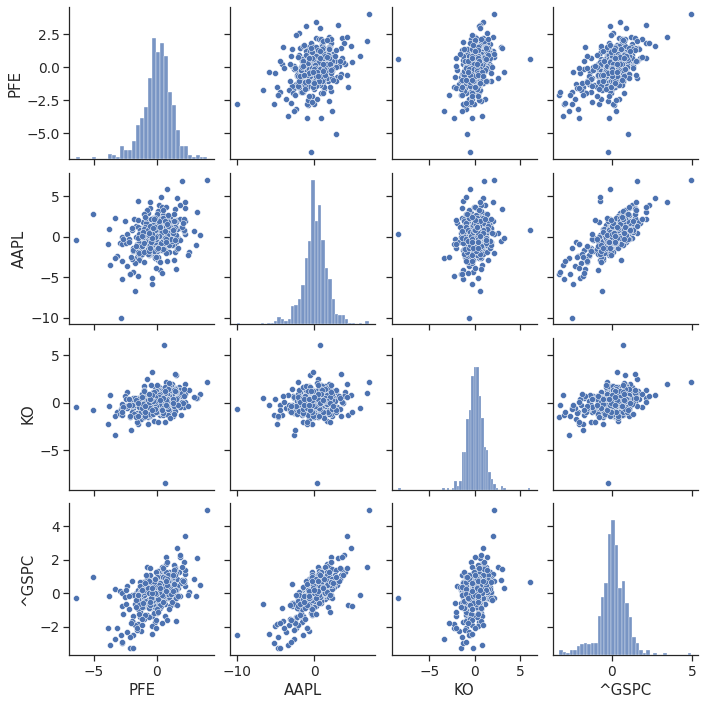

In [ ]:
#store daily returns of all above stocks in a new dataframe 
pct_chg_df = combined_df.pct_change()*100
pct_chg_df.dropna(inplace = True, how = "any", axis = 0)
#plotting pairplot  
import seaborn as sns
sns.set(style = "ticks", font_scale = 1.25)
sns.pairplot(pct_chg_df)

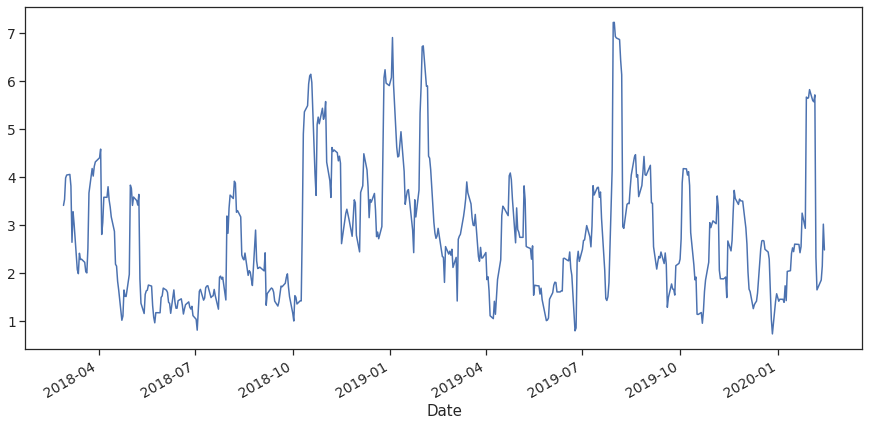

In [ ]:
#Plotting volatility of the PFE US equity
PFE_vol = pct_chg_df['PFE'].rolling(7).std()*np.sqrt(7)
PFE_vol.plot(figsize = (15, 7)) 

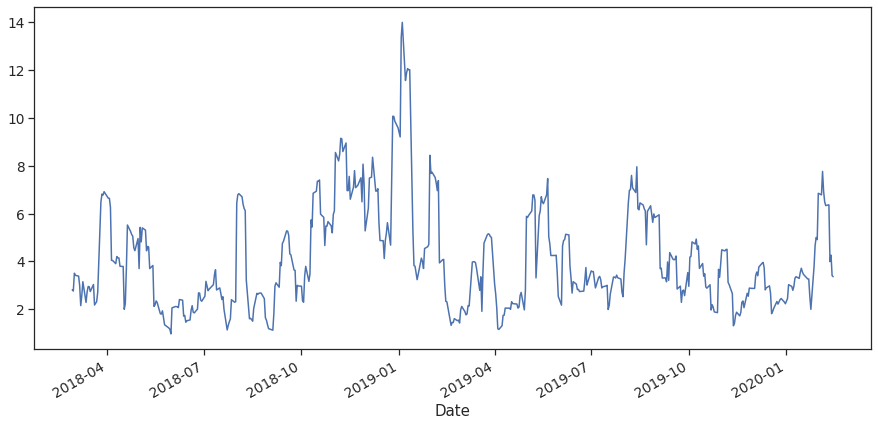

In [ ]:
#Plotting volatility of the AAPL US equity
AAPL_vol = pct_chg_df['AAPL'].rolling(7).std()*np.sqrt(7)
AAPL_vol.plot(figsize = (15, 7)) 

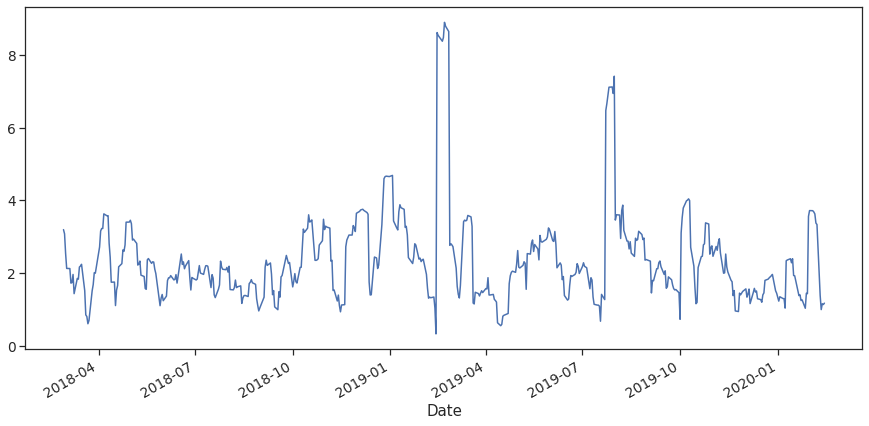

In [ ]:
#Plotting volatility of the KO US equity
KO_vol = pct_chg_df['KO'].rolling(7).std()*np.sqrt(7)
KO_vol.plot(figsize = (15, 7)) 

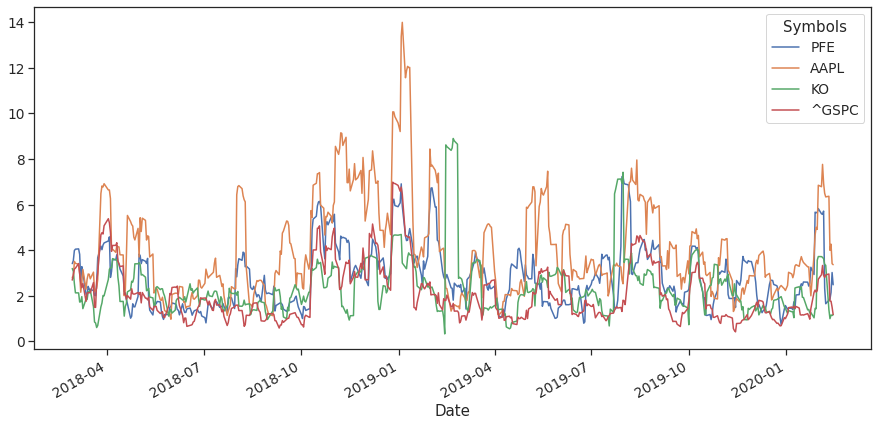

In [ ]:
#Next we see the comparative volatility analysis of our stocks w.r.t. the S&P 500 index
volatility = pct_chg_df[['PFE', 'AAPL', 'KO', '^GSPC']].rolling(7).std()*np.sqrt(7)
volatility.plot(figsize = (15, 7))